In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import MissingIndicator

In [2]:
# to do

# clean up dataset once and for all
# add methods used for cleaning
# add del statements

In [3]:
# load data into a DataFrame object
df = pd.read_csv('data/kc_house_Data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# split df into categorical and numerical variable types
df = df.drop(['id'], axis=1)

target = df[['price']]
target = np.log(target)

cont_df = df[['sqft_living','sqft_lot','sqft_above','sqft_basement',
             'sqft_living15','sqft_lot15']]

disc_df = df[['bedrooms','bathrooms','floors','condition','grade']]

lat_long = df[['lat','long']]

cat_df = df[['date','bedrooms','bathrooms','floors','waterfront',
            'view','condition','grade','yr_built','yr_renovated',
            'zipcode']]

### processing continuous variable columns

In [6]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [7]:
#issues in cont_df

# 1/ sqft_basement has 454 unknown values.
# proposed solutions:

# interpolate with basement size of nearby properties

# drop rows altogether from entire df (have to check if these
# properties are spaced out or conecntrated: are we losing information, and if so, are we okay with it?)

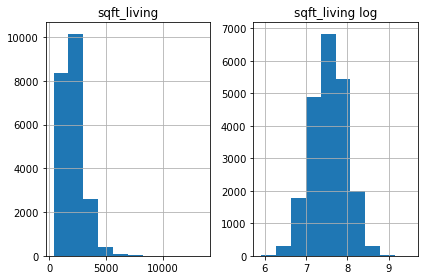

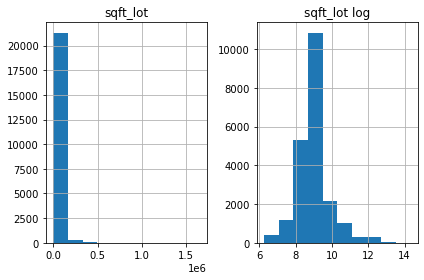

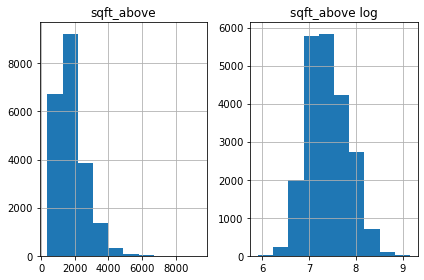

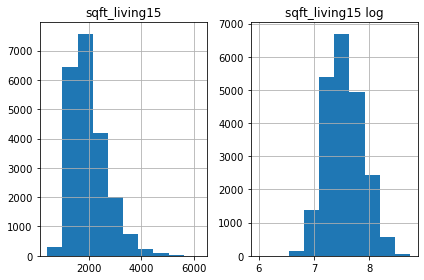

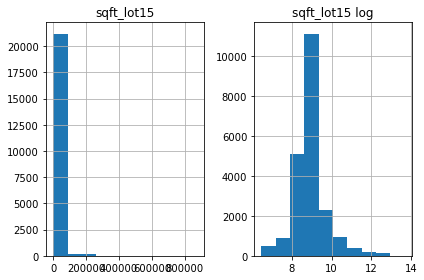

In [8]:
for col in cont_df.drop('sqft_basement', axis=1).columns:
    plt.subplot(1,2,1);
    plt.title(col)
    cont_df[col].hist()

    plt.subplot(1,2,2);
    plt.title(col + ' log')
    np.log(cont_df[col]).hist()
    plt.tight_layout();
    plt.show();

In [9]:
# log transform columns appropriately
cont_df = cont_df.drop('sqft_basement', axis=1)
cont_df = np.log(cont_df)

In [10]:
# normalize columns appropriately
cont_df = cont_df.apply(normalize)

In [11]:
# cont_df processing complete

### processing discrete variable columns

In [12]:
disc_df.head()

,bedrooms,bathrooms,floors,condition,grade
0,3,1.00,1.0,Average,7 Average
1,3,2.25,2.0,Average,7 Average
2,2,1.00,1.0,Average,6 Low Average
3,4,3.00,1.0,Very Good,7 Average
4,3,2.00,1.0,Average,8 Good


In [13]:
disc_df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [14]:
disc_df['grade'] = disc_df['grade'].map(lambda x: int(x.split()[0]))

<ipython-input-14-59f13f571f3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disc_df['grade'] = disc_df['grade'].map(lambda x: int(x.split()[0]))


In [15]:
pd.concat([target, disc_df], axis=1).corr()['price']

price        1.000000
bedrooms     0.343360
bathrooms    0.551249
floors       0.310630
grade        0.703720
Name: price, dtype: float64

In [18]:
# question
# at what point do we begin treating a discrete as a linearly correlated numerical variable

### processing categorical variables columns

In [19]:
cat_df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,10/13/2014,3,1.00,1.0,NaN,NONE,Average,7 Average,1955,0.0,98178
1,12/9/2014,3,2.25,2.0,NO,NONE,Average,7 Average,1951,1991.0,98125
2,2/25/2015,2,1.00,1.0,NO,NONE,Average,6 Low Average,1933,NaN,98028
3,12/9/2014,4,3.00,1.0,NO,NONE,Very Good,7 Average,1965,0.0,98136
4,2/18/2015,3,2.00,1.0,NO,NONE,Average,8 Good,1987,0.0,98074


In [20]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          21597 non-null  object 
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   floors        21597 non-null  float64
 4   waterfront    19221 non-null  object 
 5   view          21534 non-null  object 
 6   condition     21597 non-null  object 
 7   grade         21597 non-null  object 
 8   yr_built      21597 non-null  int64  
 9   yr_renovated  17755 non-null  float64
 10  zipcode       21597 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.8+ MB


In [21]:
# split date into month and year

In [22]:
cat_df['month'] = cat_df['date'].map(lambda x: int(x.split('/')[0]))
cat_df['year'] = cat_df['date'].map(lambda x: int(x.split('/')[-1]))

cat_df = cat_df.drop('date', axis=1)

<ipython-input-22-529c5157f859>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['month'] = cat_df['date'].map(lambda x: int(x.split('/')[0]))
<ipython-input-22-529c5157f859>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['year'] = cat_df['date'].map(lambda x: int(x.split('/')[-1]))


In [23]:
# after inspection, theere is no good way to determine whether a property is 
# waterfront if not indicated in the column. however, waterfront properties always
# get a boost in price simply for their property vlaue. so this is definitely a 
# question to investigate
# resolution:
# drop waterfront column
# drop empty rows from df entirely
# try to find a way to interpolate???


In [24]:
cat_df['waterfront'] = cat_df['waterfront'].eq('YES').mul(1)

In [25]:
cat_df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [26]:
# view column
cat_df.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,month,year
0,3,1.00,1.0,0,NONE,Average,7 Average,1955,0.0,98178,10,2014
1,3,2.25,2.0,0,NONE,Average,7 Average,1951,1991.0,98125,12,2014
2,2,1.00,1.0,0,NONE,Average,6 Low Average,1933,NaN,98028,2,2015
3,4,3.00,1.0,0,NONE,Very Good,7 Average,1965,0.0,98136,12,2014
4,3,2.00,1.0,0,NONE,Average,8 Good,1987,0.0,98074,2,2015


In [27]:
cat_df['view'] = cat_df['view'].fillna('NONE')
view_dummies = pd.get_dummies(cat_df['view'], prefix='view_', drop_first=True)
cat_df = cat_df.drop(['view'], axis=1)
cat_df = pd.concat([cat_df, view_dummies], axis=1)

In [28]:
bedroom_dummies = pd.get_dummies(cat_df['bedrooms'], prefix='bedrooms=', drop_first=True)
bathroom_dummies = pd.get_dummies(cat_df['bathrooms'], prefix='bathrooms=', drop_first=True)
floor_dummies = pd.get_dummies(cat_df['floors'], prefix='floors=', drop_first=True)
condition_dummies = pd.get_dummies(cat_df['condition'], prefix='condition=', drop_first=True)

In [29]:
cat_df = cat_df.drop(['bedrooms','bathrooms','floors','condition'], axis=1)
cat_df = pd.concat([cat_df, bedroom_dummies, bathroom_dummies, floor_dummies, condition_dummies], axis=1)

In [30]:
cat_df['grade'] = cat_df['grade'].map(lambda x: int(x.split()[0]))

In [31]:
cat_df['recently_renovated'] = (cat_df['yr_renovated'] > 1999)

In [32]:
df=cont_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']


In [33]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.918665
"(sqft_lot15, sqft_lot)",0.918665
"(sqft_living, sqft_above)",0.864979
"(sqft_above, sqft_living)",0.864979


In [34]:
cat_df

,waterfront,grade,yr_built,yr_renovated,zipcode,month,year,view__EXCELLENT,view__FAIR,view__GOOD,...,floors=_1.5,floors=_2.0,floors=_2.5,floors=_3.0,floors=_3.5,condition=_Fair,condition=_Good,condition=_Poor,condition=_Very Good,recently_renovated
0,0,7,1955,0.0,98178,10,2014,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1,0,7,1951,1991.0,98125,12,2014,0,0,0,...,0,1,0,0,0,0,0,0,0,False
2,0,6,1933,NaN,98028,2,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,False
3,0,7,1965,0.0,98136,12,2014,0,0,0,...,0,0,0,0,0,0,0,0,1,False
4,0,8,1987,0.0,98074,2,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,8,2009,0.0,98103,5,2014,0,0,0,...,0,0,0,1,0,0,0,0,0,False
21593,0,8,2014,0.0,98146,2,2015,0,0,0,...,0,1,0,0,0,0,0,0,0,False
21594,0,7,2009,0.0,98144,6,2014,0,0,0,...,0,1,0,0,0,0,0,0,0,False
21595,0,8,2004,0.0,98027,1,2015,0,0,0,...,0,1,0,0,0,0,0,0,0,False


In [36]:
cat_df['yr_renovated']

0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: float64